In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results_milestones_nov24 = './data/Milestones - timesStandard-prod-Final.csv'

df = pd.read_csv(results_milestones_nov24)





In [78]:
# Define the relevant columns
correct_milestones_columns = ['right folder', 'right file', 'right class', 'right method', 'right lines', 'correct', 'sound solution']
time_columns = ['folder', 'file', 'class', 'method', 'line', 'solution']
# print(df.iloc[:, 12:])
#print(df["Control YOE"])
# Ensure the YOE columns are numeric
df['Control YOE'] = pd.to_numeric(df['Control YOE'], errors='coerce')
df['Alt YOE'] = pd.to_numeric(df['Alt YOE'], errors='coerce')
# print(df['Experience'])
# Map 'Control YOE' for Control group and 'Alt YOE' for Treatment group
df['Experience'] = df.apply(lambda row: row['Control YOE'] if row['group'] == 'Control' else row['Alt YOE'], axis=1)
# print(df['Experience'])
# Mask correct milestones and use experience values
correct_experience_by_group = pd.DataFrame()
for correct_col in correct_milestones_columns:
    correct_experience_by_group[correct_col] = df['Experience'].where(df[correct_col] == 'y')
#print(correct_experience_by_group)



In [79]:
# Calculate the average number of correct milestones per participant, grouped by group
correct_milestones_sum_by_group = df.groupby('group')[correct_milestones_columns].apply(lambda x: (x == 'y').sum().mean())
#print(correct_milestones_sum_by_group.head())
# Calculate the average years of experience for participants who completed milestones correctly
avg_experience_for_correct_by_group = df.groupby('group').apply(lambda group: correct_experience_by_group.loc[group.index].mean())
#print(avg_experience_for_correct_by_group.head())
# avg_experience_for_correct_by_group.head()
# Create a comparison DataFrame
comparison_correct_experience_df = pd.DataFrame({
    'Avg Correct Milestones': correct_milestones_sum_by_group,
    'Avg Experience for Correct': avg_experience_for_correct_by_group.mean(axis=1)
})
#print(comparison_correct_experience_df.head())
colors = ['lightsalmon', 'silver']


/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_20657/4142335561.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_experience_for_correct_by_group = df.groupby('group').apply(lambda group: correct_experience_by_group.loc[group.index].mean())


In [80]:
milestone_columns = ['issue', 'problem', 'folder', 'file', 'class', 'method', 'line', 'solution', 'implement']

# Calculate the number of participants that completed each milestone
milestone_counts = df[milestone_columns].notna().sum()



/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_20657/3501991396.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_experience_for_correct_by_group = df.groupby('group').apply(lambda group: correct_experience_by_group.loc[group.index].mean())


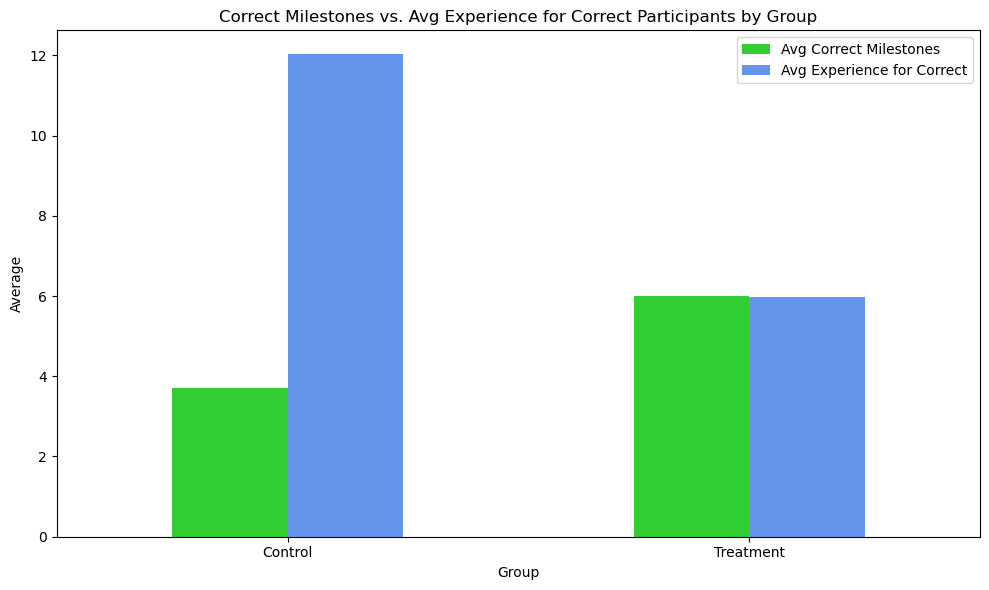

In [81]:

# We will mask the correct milestones marked as 'y' and use the corresponding experience values
correct_experience_by_group = pd.DataFrame()
for correct_col in correct_milestones_columns:
    correct_experience_by_group[correct_col] = df['Experience'].where(df[correct_col] == 'y')

# Calculate the average number of correct milestones per participant, grouped by group
correct_milestones_sum_by_group = df.groupby('group')[correct_milestones_columns].apply(lambda x: (x == 'y').sum().mean())

# Calculate the average years of experience for each group based on correct milestones
avg_experience_for_correct_by_group = df.groupby('group').apply(lambda group: correct_experience_by_group.loc[group.index].mean())

# Creating a comparison DataFrame
comparison_correct_experience_df = pd.DataFrame({
    'Avg Correct Milestones': correct_milestones_sum_by_group,
    'Avg Experience for Correct': avg_experience_for_correct_by_group.mean(axis=1)  # Get the mean of experience for correct milestones
})

# Plotting the result
colors = ['limegreen', 'cornflowerblue']
comparison_correct_experience_df.plot(kind='bar', figsize=(10, 6), color=colors)

plt.title('Correct Milestones vs. Avg Experience for Correct Participants by Group')
plt.xlabel('Group')
plt.ylabel('Average')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('./figures/Correct_Milestones_vs_Experience_for_Correct_by_Group.png', format='png')
plt.savefig('./figures/Correct_Milestones_vs_Experience_for_Correct_by_Group.pdf', format='pdf')

# Show the plot
plt.show()


/var/folders/l8/z96b6x2n6kn4frf6tqv95ddr0000gn/T/ipykernel_20657/1568707279.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_contrib_for_correct_by_group = df.groupby('group').apply(lambda group: correct_contributions_by_group.loc[group.index].mean())


comparison_correct_contrib_df            Avg Correct Milestones  Avg Contributions for Correct
group                                                           
Control                  3.714286                       1.478571
Treatment                6.000000                       0.502165


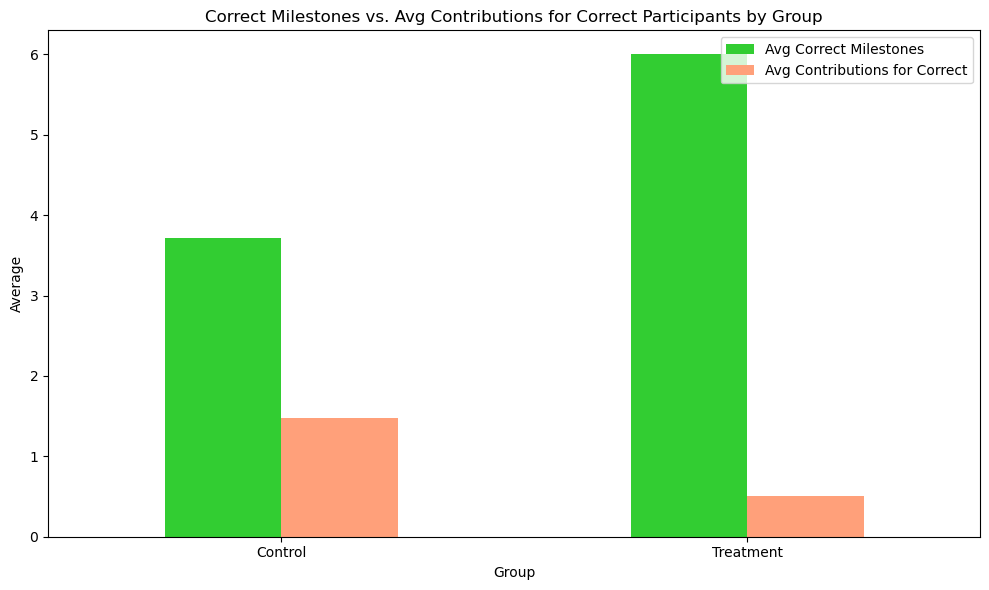

In [82]:
# Ensure the contribution columns are numeric
df['Control Contribs'] = pd.to_numeric(df['Control Contribs'], errors='coerce')
df['Alt Contrib'] = pd.to_numeric(df['Alt Contrib'], errors='coerce')

# Map 'Control Contribs' for Control group and 'Alt Contrib' for Treatment group
df['Contributions'] = df.apply(lambda row: row['Control Contribs'] if row['group'] == 'Control' else row['Alt Contrib'], axis=1)

# Mask correct milestones and use contributions values
correct_contributions_by_group = pd.DataFrame()
for correct_col in correct_milestones_columns:
    correct_contributions_by_group[correct_col] = df['Contributions'].where(df[correct_col] == 'y')

# Calculate the average number of correct milestones per participant, grouped by group
correct_milestones_sum_by_group = df.groupby('group')[correct_milestones_columns].apply(lambda x: (x == 'y').sum().mean())

# Calculate the average contributions for participants who completed milestones correctly
avg_contrib_for_correct_by_group = df.groupby('group').apply(lambda group: correct_contributions_by_group.loc[group.index].mean())

# Creating a comparison DataFrame
comparison_correct_contrib_df = pd.DataFrame({
    'Avg Correct Milestones': correct_milestones_sum_by_group,
    'Avg Contributions for Correct': avg_contrib_for_correct_by_group.mean(axis=1)
})
print("comparison_correct_contrib_df", comparison_correct_contrib_df)
colors = ['limegreen', 'lightsalmon']
# Plotting the result
comparison_correct_contrib_df.plot(kind='bar', figsize=(10, 6), color=colors)

plt.title('Correct Milestones vs. Avg Contributions for Correct Participants by Group')
plt.xlabel('Group')
plt.ylabel('Average')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('./figures/Correct_Milestones_vs_Contributions_for_Correct_by_Group.png', format='png')
plt.savefig('./figures/Correct_Milestones_vs_Contributions_for_Correct_by_Group.pdf', format='pdf')
# Show the plot
plt.show()
comparison_correct_contrib_df.to_csv("./data/comparison_correct_contrib_df.csv")

completion_percentage            issue  problem      folder        file       class     method  \
group                                                                      
Control    100.0    100.0   84.615385   84.615385   84.615385  76.923077   
Treatment  100.0    100.0  100.000000  100.000000  100.000000  84.615385   

                line    solution  implement  
group                                        
Control    69.230769   69.230769  53.846154  
Treatment  76.923077  100.000000  69.230769  
average_completion_time               issue    problem     folder       file      class     method  \
group                                                                        
Control    9.076923  19.769231  32.181818  32.272727  34.090909  33.300000   
Treatment  5.692308  19.538462  33.692308  36.769231  36.846154  36.545455   

                line   solution  implement  
group                                       
Control    34.777778  42.444444  49.285714  
Treatment  35.900

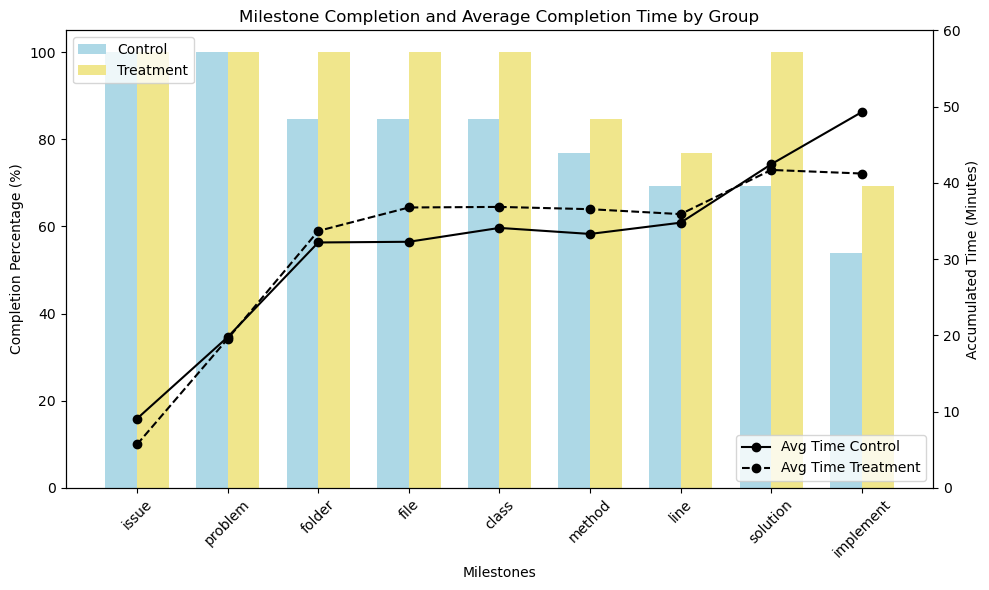

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your dataframe and 'milestone_columns' contains the list of milestones

# Define groups
groups = ['Control', 'Treatment']

# Calculate the percentage of participants who completed each milestone
completion_percentage = df.groupby('group')[milestone_columns].apply(lambda x: x.notna().mean() * 100)
print ('completion_percentage',completion_percentage)
# Calculate the average time to complete each milestone
average_completion_time = df.groupby('group')[milestone_columns].mean()
print ('average_completion_time', average_completion_time)
# Define milestones and positions for the plot
milestones = milestone_columns  # List of milestone names
x = np.arange(len(milestones))  # The label locations

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot completion percentage as stacked bars
bar_width = 0.35
control_bars = ax1.bar(x - bar_width / 2, completion_percentage.loc['Control'], bar_width, label='Control', color='lightblue')
treatment_bars = ax1.bar(x + bar_width / 2, completion_percentage.loc['Treatment'], bar_width, label='Treatment', color='khaki')#, hatch='/')

# Set up the second axis for average completion time
ax2 = ax1.twinx()
ax2.plot(x, average_completion_time.loc['Control'], 'ko-', label='Avg Time Control')
ax2.plot(x, average_completion_time.loc['Treatment'], 'ko--', label='Avg Time Treatment')

# Labels, titles, and legends
ax1.set_xlabel('Milestones')
ax1.set_ylabel('Completion Percentage (%)', color='black')
ax2.set_ylabel('Accumulated Time (Minutes)', color='black')
ax1.set_title('Milestone Completion and Average Completion Time by Group')
ax1.set_xticks(x)
ax1.set_xticklabels(milestones, rotation=45)

ax1.legend(loc='upper left')
ax2.legend(loc='lower right')

plt.tight_layout()
ax2.set_ylim(0, 60)
# Save the plot
plt.savefig('./figures/milestone_completion_average_time.png', format='png')
plt.savefig('./figures/milestone_completion_average_time.pdf', format='pdf')

# Show the plot
plt.show()


correctness_percentage            right folder  right file  right class  right method  right lines  \
group                                                                         
Control       30.769231   30.769231    30.769231     23.076923    23.076923   
Treatment     46.153846   38.461538    38.461538     38.461538    38.461538   

           sound solution    correct  
group                                 
Control         38.461538  23.076923  
Treatment       84.615385  38.461538  
correct_time_taken               folder       file      class     method       line   solution  \
group                                                                         
Control    32.181818  32.272727  34.090909  33.300000  34.777778  42.444444   
Treatment  33.692308  36.769231  36.846154  36.545455  35.900000  41.692308   

           implement  
group                 
Control    49.285714  
Treatment  41.222222  
x [0 1 2 3 4 5 6]


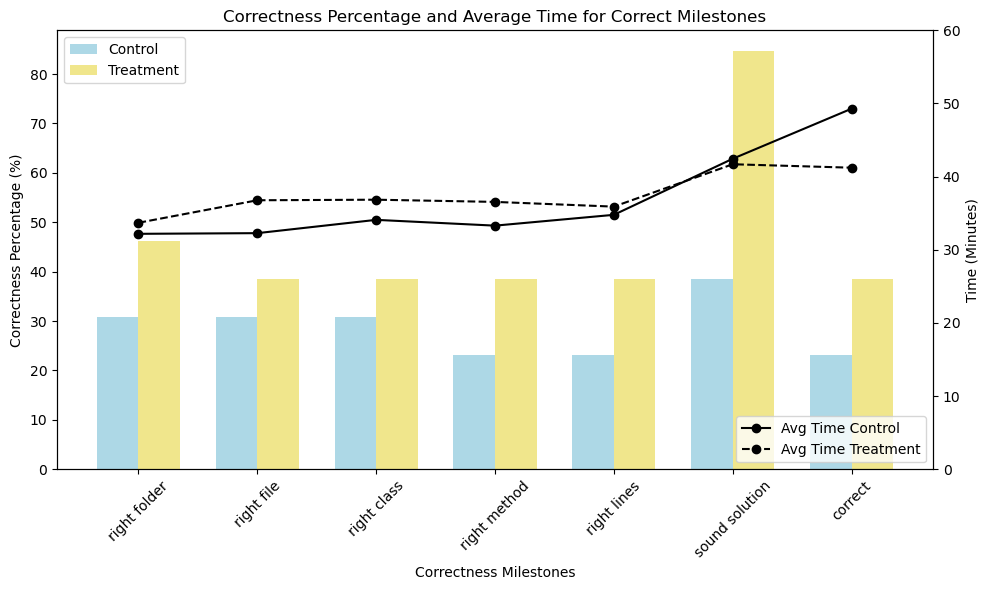

In [84]:
import matplotlib.pyplot as plt
import numpy as np



# Define the correctness columns
correctness_columns = ['right folder', 'right file', 'right class', 'right method', 'right lines', 'sound solution', 'correct']
time_columns = ['folder', 'file', 'class', 'method', 'line', 'solution', 'implement']

# Calculate the average correctness percentage for each group
correctness_percentage = df.groupby('group')[correctness_columns].apply(lambda x: (x == 'y').mean() * 100)

print('correctness_percentage', correctness_percentage)
# Calculate the average time taken for correct completions
correct_time_taken = df.groupby('group')[time_columns].mean()
print('correct_time_taken', correct_time_taken)
# Plot template
milestones = correctness_columns
x = np.arange(len(milestones))  # Label locations
print('x',x)
width = 0.35  # Bar width

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the completion percentages as stacked bars
bars1 = ax1.bar(x - width/2, correctness_percentage.loc['Control'], width, label='Control', color='lightblue')
bars2 = ax1.bar(x + width/2, correctness_percentage.loc['Treatment'], width, label='Treatment', color='khaki')#, hatch='/')

# Set up secondary y-axis for average time
ax2 = ax1.twinx()
ax2.plot(x, correct_time_taken.loc['Control'], 'ko-', label='Avg Time Control')
ax2.plot(x, correct_time_taken.loc['Treatment'], 'ko--', label='Avg Time Treatment')

# Title, labels, and ticks
ax1.set_xlabel('Correctness Milestones')
ax1.set_ylabel('Correctness Percentage (%)')
ax2.set_ylabel('Time (Minutes)')
ax1.set_title('Correctness Percentage and Average Time for Correct Milestones')
ax1.set_xticks(x)
ax1.set_xticklabels(milestones, rotation=45)

# Legends
ax1.legend(loc='upper left')
ax2.legend(loc='lower right')
ax2.set_ylim(0, 60)
plt.tight_layout()

# Save the plot as PNG and PDF
plt.savefig('./figures/correctness_percentage_time_by_group.png', format='png')
plt.savefig('./figures/correctness_percentage_time_by_group.pdf', format='pdf')

# Show the plot
plt.show()


correctness_percentage            correct folder  correct file  correct class  correct method  \
group                                                                    
Control         30.769231     30.769231      30.769231       23.076923   
Treatment       46.153846     38.461538      38.461538       38.461538   

           correct lines  soundness  correct implementation  
group                                                        
Control        23.076923  38.461538               23.076923  
Treatment      38.461538  84.615385               38.461538  
correct_time_taken               folder       file      class     method       line   solution  \
group                                                                         
Control    32.181818  32.272727  34.090909  33.300000  34.777778  42.444444   
Treatment  33.692308  36.769231  36.846154  36.545455  35.900000  41.692308   

           implement  
group                 
Control    49.285714  
Treatment  41.222222  
x [0

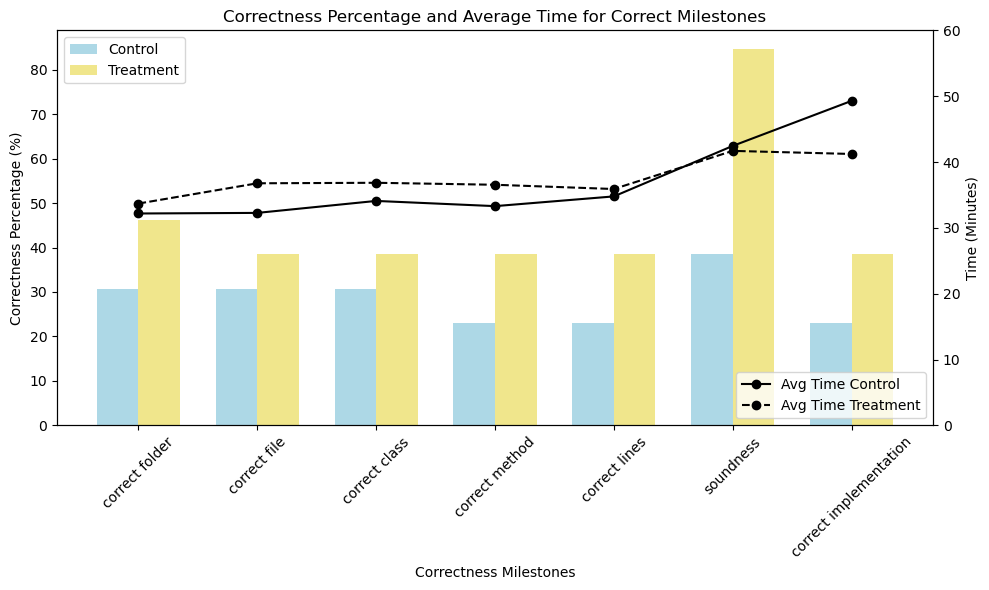

In [85]:
import matplotlib.pyplot as plt
import numpy as np

rename_mapping = {
    
    'right folder': 'correct folder',
    'right file': 'correct file',
    'right class': 'correct class',
    'right method': 'correct method',
    'right lines': 'correct lines',
    'sound solution': 'soundness',
    'correct': 'correct implementation',
}

# Rename the dataframe columns
df.rename(columns=rename_mapping, inplace=True)


# Define the correctness columns
correctness_columns = ['correct folder', 'correct file', 'correct class', 'correct method', 'correct lines', 'soundness', 'correct implementation']
time_columns = ['folder', 'file', 'class', 'method', 'line', 'solution', 'implement']

# Calculate the average correctness percentage for each group
correctness_percentage = df.groupby('group')[correctness_columns].apply(lambda x: (x == 'y').mean() * 100)

print('correctness_percentage', correctness_percentage)
# Calculate the average time taken for correct completions
correct_time_taken = df.groupby('group')[time_columns].mean()
print('correct_time_taken', correct_time_taken)
# Plot template
milestones = correctness_columns
x = np.arange(len(milestones))  # Label locations
print('x',x)
width = 0.35  # Bar width

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the completion percentages as stacked bars
bars1 = ax1.bar(x - width/2, correctness_percentage.loc['Control'], width, label='Control', color='lightblue')
bars2 = ax1.bar(x + width/2, correctness_percentage.loc['Treatment'], width, label='Treatment', color='khaki')#, hatch='/')

# Set up secondary y-axis for average time
ax2 = ax1.twinx()
ax2.plot(x, correct_time_taken.loc['Control'], 'ko-', label='Avg Time Control')
ax2.plot(x, correct_time_taken.loc['Treatment'], 'ko--', label='Avg Time Treatment')

# Title, labels, and ticks
ax1.set_xlabel('Correctness Milestones')
ax1.set_ylabel('Correctness Percentage (%)')
ax2.set_ylabel('Time (Minutes)')
ax1.set_title('Correctness Percentage and Average Time for Correct Milestones')
ax1.set_xticks(x)
ax1.set_xticklabels(milestones, rotation=45)

# Legends
ax1.legend(loc='upper left')
ax2.legend(loc='lower right')
ax2.set_ylim(0, 60)
plt.tight_layout()

# Save the plot as PNG and PDF
plt.savefig('./figures/correctness_percentage_time_by_group.png', format='png')
plt.savefig('./figures/correctness_percentage_time_by_group.pdf', format='pdf')

# Show the plot
plt.show()


In [86]:
rename_mapping = {
    'issue': 'find the issue',
    'problem': 'summarize the problem',
    'folder': 'find the folder',
    'file': 'find the file',
    'class': 'find the class',
    'method': 'find the method',
    'line': 'find the lines',
    'solution': 'summarize the solution',
    'implement': 'implement the change'
}

# Rename the dataframe columns
df.rename(columns=rename_mapping, inplace=True)

In [87]:
milestone_columns = ['find the issue', 'summarize the problem', 'find the folder', 'find the file', 'find the class', 'find the method', 'find the lines', 'summarize the solution', 'implement the change']
df

,PX,start,group,find the issue,summarize the problem,find the folder,find the file,find the class,find the method,find the lines,summarize the solution,implement the change,end,changed issue,changed folder,changed file,changed class,changed method,right problem,correct folder,correct file,correct class,correct method,correct lines,Correctness Explanation,correct implementation,soundness,alternative answer,Gift card requested,Gift card received,group.1,issue_number,Control YOE,Control Contribs,Alt YOE,Alt Contrib,soundness2,Experience,Contributions
0,P0,2:35 PM,Control,17,17,18.0,18.0,19.0,21.0,21.0,24.0,43.0,45,1,0,0,0,0,n,y,y,y,n,n,Participant only had 1 of two methods identifi...,n,n,n,y,y,Control,5679,4.0,0.0,NaN,NaN,n,4.0,0.0
1,P1,10:15 AM,Treatment,2,3,44.0,45.0,45.0,46.0,47.0,48.0,50.0,55,0,1,0,0,0,y,y,y,y,y,y,Completed the code changes in the right place ...,y,y,n,y,y,Treatment,5485,NaN,NaN,7.0,0.0,y,7.0,0.0
2,P2,3:09:00 PM,Control,1,6,56.0,56.0,58.0,NaN,NaN,NaN,NaN,58,0,2,2,0,0,y,n,n,n,n,n,He did not find the correct folder or any othe...,n,n,n,y,y,Treatment,4612,3.0,0.0,NaN,NaN,y,3.0,0.0
3,P3,4:21:00 PM,Treatment,3,19,23.0,23.0,23.0,27.0,27.0,46.0,46.0,46,0,0,0,0,0,y,n,n,n,n,n,He did not find the correct folder or any othe...,n,y,n,y,y,Treatment,5194,NaN,NaN,9.0,9.0,n,9.0,9.0
4,P4,1:20 PM,Control,4,14,38.0,38.0,38.0,41.0,41.0,50.0,56.0,56,0,0,0,0,0,y,n,n,n,n,n,He did not find the correct folder or any othe...,n,n,n,y,y,Control,4612,1.0,1.0,NaN,NaN,n,1.0,1.0
5,P5,3:22 PM,Treatment,20,25,31.0,31.0,31.0,32.0,33.0,37.0,38.0,38,0,0,0,0,0,y,n,n,n,n,n,He did not find the correct folder or any othe...,n,y,n,y,y,Treatment,5069,NaN,NaN,4.0,2.0,y,4.0,2.0
6,P6,12:44 PM,Control,11,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,0,0,0,0,0,y,n,n,n,n,n,He did not find the correct folder or any othe...,n,n,n,y,y,Control,5485,1.0,1.0,NaN,NaN,n,1.0,1.0
7,P7,4:34 PM,Treatment,5,25,35.0,35.0,35.0,37.0,37.0,37.0,46.0,46,0,0,0,0,0,y,n,n,n,n,n,He did not find the correct folder or any othe...,n,y,n,y,y,Treatment,5485,NaN,NaN,2.0,0.0,n,2.0,0.0
8,P8,4:13 PM,Treatment,7,33,43.0,43.0,43.0,43.0,43.0,43.0,43.0,58,0,0,0,0,0,y,y,y,y,y,y,Completed the code changes in the right place.,y,y,n,y,y,Treatment,5485,NaN,NaN,5.0,1.0,y,5.0,1.0
9,P9,3:14 PM,Control,7,22,25.0,25.0,37.0,46.0,57.0,57.0,NaN,57,0,0,0,0,0,y,n,n,n,n,n,He did not find the correct folder or any othe...,n,y,n,y,y,Control,5069,2.0,2.0,NaN,NaN,n,2.0,2.0


completion_percentage            find the issue  summarize the problem  find the folder  \
group                                                               
Control             100.0                  100.0        84.615385   
Treatment           100.0                  100.0       100.000000   

           find the file  find the class  find the method  find the lines  \
group                                                                       
Control        84.615385       84.615385        76.923077       69.230769   
Treatment     100.000000      100.000000        84.615385       76.923077   

           summarize the solution  implement the change  
group                                                    
Control                 69.230769             53.846154  
Treatment              100.000000             69.230769  
average_completion_time            find the issue  summarize the problem  find the folder  \
group                                                              

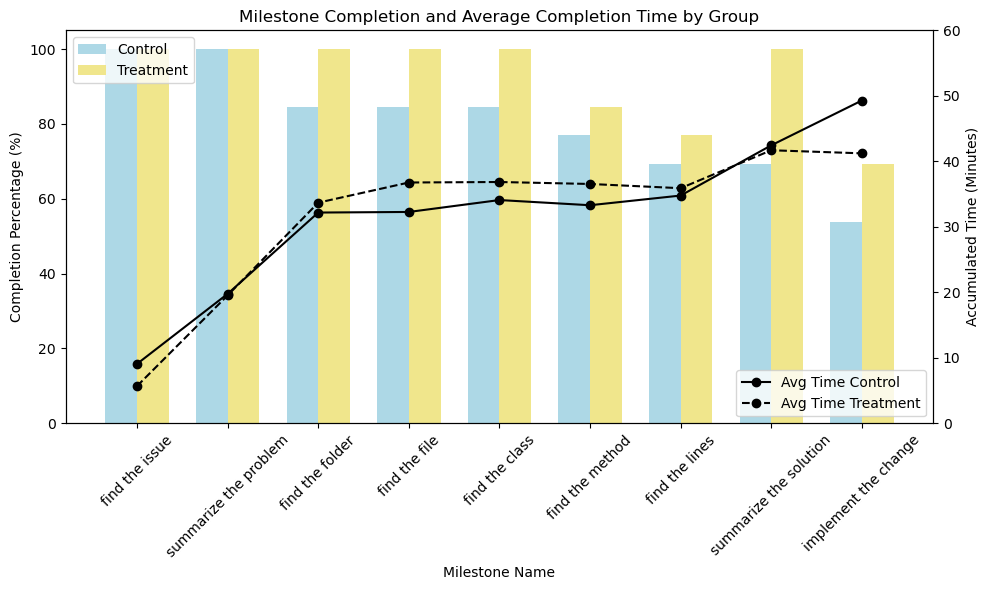

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your dataframe and 'milestone_columns' contains the list of milestones



# Define groups
groups = ['Control', 'Treatment']

# Calculate the percentage of participants who completed each milestone
completion_percentage = df.groupby('group')[milestone_columns].apply(lambda x: x.notna().mean() * 100)
print('completion_percentage', completion_percentage)

# Calculate the average time to complete each milestone
average_completion_time = df.groupby('group')[milestone_columns].mean()
print('average_completion_time', average_completion_time)

# Define milestones and positions for the plot
milestones = milestone_columns  # List of milestone names
x = np.arange(len(milestones))  # The label locations

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot completion percentage as stacked bars
bar_width = 0.35
control_bars = ax1.bar(x - bar_width / 2, completion_percentage.loc['Control'], bar_width, label='Control', color='lightblue')
treatment_bars = ax1.bar(x + bar_width / 2, completion_percentage.loc['Treatment'], bar_width, label='Treatment', color='khaki')

# Set up the second axis for average completion time
ax2 = ax1.twinx()
ax2.plot(x, average_completion_time.loc['Control'], 'ko-', label='Avg Time Control')
ax2.plot(x, average_completion_time.loc['Treatment'], 'ko--', label='Avg Time Treatment')

# Labels, titles, and legends
# Updated the X axis caption from "Milestones" to "Milestone Name"
ax1.set_xlabel('Milestone Name')
ax1.set_ylabel('Completion Percentage (%)', color='black')
ax2.set_ylabel('Accumulated Time (Minutes)', color='black')
ax1.set_title('Milestone Completion and Average Completion Time by Group')
ax1.set_xticks(x)
ax1.set_xticklabels(milestones, rotation=45)

ax1.legend(loc='upper left')
ax2.legend(loc='lower right')

plt.tight_layout()
ax2.set_ylim(0, 60)

# Save the plot
plt.savefig('./figures/milestone_completion_average_time.png', format='png')
plt.savefig('./figures/milestone_completion_average_time.pdf', format='pdf')

# Show the plot
plt.show()


In [89]:
results_milestones_nov24 = './data/Milestones - timesStandard-prod-Final.csv'

df = pd.read_csv(results_milestones_nov24)

In [90]:
rename_mapping = {
    
    'right folder': 'correct folder',
    'right file': 'correct file',
    'right class': 'correct class',
    'right method': 'correct method',
    'right lines': 'correct lines',
    'sound solution': 'soundness',
    'correct': 'correct implementation',
    
    'folder': 'find the folder',
    'file': 'find the file',
    'class': 'find the class',
    'method': 'find the method',
    'line': 'find the lines',
    'solution': 'summarize the solution',
    'implement': 'implement the change'
}

# Rename the dataframe columns
df.rename(columns=rename_mapping, inplace=True)


In [91]:
df.columns

Index(['PX', 'start', 'group', 'issue', 'problem', 'find the folder',
       'find the file', 'find the class', 'find the method', 'find the lines',
       'summarize the solution', 'implement the change', 'end',
       'changed issue', 'changed folder', 'changed file', 'changed class',
       'changed method', 'right problem', 'correct folder', 'correct file',
       'correct class', 'correct method', 'correct lines',
       'Correctness Explanation', 'correct implementation', 'soundness',
       'alternative answer', 'Gift card requested', 'Gift card received',
       'group.1', 'issue_number', 'Control YOE', 'Control Contribs', 'Alt YOE',
       'Alt Contrib', 'soundness2'],
      dtype='object')

In [92]:
pd.set_option('display.max_columns', None)
df

,PX,start,group,issue,problem,find the folder,find the file,find the class,find the method,find the lines,summarize the solution,implement the change,end,changed issue,changed folder,changed file,changed class,changed method,right problem,correct folder,correct file,correct class,correct method,correct lines,Correctness Explanation,correct implementation,soundness,alternative answer,Gift card requested,Gift card received,group.1,issue_number,Control YOE,Control Contribs,Alt YOE,Alt Contrib,soundness2
0,P0,2:35 PM,Control,17,17,18.0,18.0,19.0,21.0,21.0,24.0,43.0,45,1,0,0,0,0,n,y,y,y,n,n,Participant only had 1 of two methods identifi...,n,n,n,y,y,Control,5679,4.0,0.0,NaN,NaN,n
1,P1,10:15 AM,Treatment,2,3,44.0,45.0,45.0,46.0,47.0,48.0,50.0,55,0,1,0,0,0,y,y,y,y,y,y,Completed the code changes in the right place ...,y,y,n,y,y,Treatment,5485,NaN,NaN,7.0,0.0,y
2,P2,3:09:00 PM,Control,1,6,56.0,56.0,58.0,NaN,NaN,NaN,NaN,58,0,2,2,0,0,y,n,n,n,n,n,He did not find the correct folder or any othe...,n,n,n,y,y,Treatment,4612,3.0,0.0,NaN,NaN,y
3,P3,4:21:00 PM,Treatment,3,19,23.0,23.0,23.0,27.0,27.0,46.0,46.0,46,0,0,0,0,0,y,n,n,n,n,n,He did not find the correct folder or any othe...,n,y,n,y,y,Treatment,5194,NaN,NaN,9.0,9.0,n
4,P4,1:20 PM,Control,4,14,38.0,38.0,38.0,41.0,41.0,50.0,56.0,56,0,0,0,0,0,y,n,n,n,n,n,He did not find the correct folder or any othe...,n,n,n,y,y,Control,4612,1.0,1.0,NaN,NaN,n
5,P5,3:22 PM,Treatment,20,25,31.0,31.0,31.0,32.0,33.0,37.0,38.0,38,0,0,0,0,0,y,n,n,n,n,n,He did not find the correct folder or any othe...,n,y,n,y,y,Treatment,5069,NaN,NaN,4.0,2.0,y
6,P6,12:44 PM,Control,11,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,0,0,0,0,0,y,n,n,n,n,n,He did not find the correct folder or any othe...,n,n,n,y,y,Control,5485,1.0,1.0,NaN,NaN,n
7,P7,4:34 PM,Treatment,5,25,35.0,35.0,35.0,37.0,37.0,37.0,46.0,46,0,0,0,0,0,y,n,n,n,n,n,He did not find the correct folder or any othe...,n,y,n,y,y,Treatment,5485,NaN,NaN,2.0,0.0,n
8,P8,4:13 PM,Treatment,7,33,43.0,43.0,43.0,43.0,43.0,43.0,43.0,58,0,0,0,0,0,y,y,y,y,y,y,Completed the code changes in the right place.,y,y,n,y,y,Treatment,5485,NaN,NaN,5.0,1.0,y
9,P9,3:14 PM,Control,7,22,25.0,25.0,37.0,46.0,57.0,57.0,NaN,57,0,0,0,0,0,y,n,n,n,n,n,He did not find the correct folder or any othe...,n,y,n,y,y,Control,5069,2.0,2.0,NaN,NaN,n


correctness_percentage            correct folder  correct file  correct class  correct method  \
group                                                                    
Control         30.769231     30.769231      30.769231       23.076923   
Treatment       46.153846     38.461538      38.461538       38.461538   

           correct lines  soundness  correct implementation  
group                                                        
Control        23.076923  38.461538               23.076923  
Treatment      38.461538  84.615385               38.461538  
correct_time_taken            find the folder  find the file  find the class  find the method  \
group                                                                        
Control          32.181818      32.272727       34.090909        33.300000   
Treatment        33.692308      36.769231       36.846154        36.545455   

           find the lines  summarize the solution  implement the change  
group                     

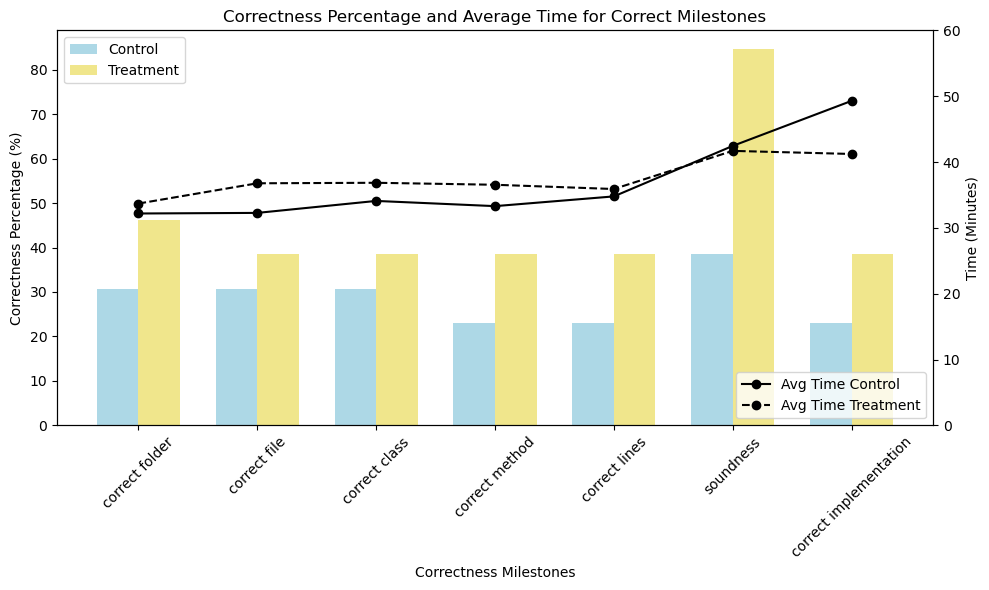

In [93]:
import matplotlib.pyplot as plt
import numpy as np


# Define the correctness columns
correctness_columns = ['correct folder',
       'correct file', 'correct class', 'correct method', 'correct lines',
       'soundness', 'correct implementation']
time_columns = ['find the folder', 'find the file', 'find the class', 'find the method',
       'find the lines', 'summarize the solution', 'implement the change']

# Calculate the average correctness percentage for each group
correctness_percentage = df.groupby('group')[correctness_columns].apply(lambda x: (x == 'y').mean() * 100)

print('correctness_percentage', correctness_percentage)
# Calculate the average time taken for correct completions
correct_time_taken = df.groupby('group')[time_columns].mean()
print('correct_time_taken', correct_time_taken)
# Plot template
milestones = correctness_columns
x = np.arange(len(milestones))  # Label locations
print('x',x)
width = 0.35  # Bar width

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the completion percentages as stacked bars
bars1 = ax1.bar(x - width/2, correctness_percentage.loc['Control'], width, label='Control', color='lightblue')
bars2 = ax1.bar(x + width/2, correctness_percentage.loc['Treatment'], width, label='Treatment', color='khaki')#, hatch='/')

# Set up secondary y-axis for average time
ax2 = ax1.twinx()
ax2.plot(x, correct_time_taken.loc['Control'], 'ko-', label='Avg Time Control')
ax2.plot(x, correct_time_taken.loc['Treatment'], 'ko--', label='Avg Time Treatment')

# Title, labels, and ticks
ax1.set_xlabel('Correctness Milestones')
ax1.set_ylabel('Correctness Percentage (%)')
ax2.set_ylabel('Time (Minutes)')
ax1.set_title('Correctness Percentage and Average Time for Correct Milestones')
ax1.set_xticks(x)
ax1.set_xticklabels(milestones, rotation=45)

# Legends
ax1.legend(loc='upper left')
ax2.legend(loc='lower right')
ax2.set_ylim(0, 60)
plt.tight_layout()

# Save the plot as PNG and PDF
plt.savefig('./figures/correctness_percentage_time_by_group.png', format='png')
plt.savefig('./figures/correctness_percentage_time_by_group.pdf', format='pdf')

# Show the plot
plt.show()